In [1]:
import os
import pandas as pd
import numpy as np

* Action Space
    - Buy
    - Hold
    - Sell
    - Time Duration
* Rewards
    - Portfolio P/L values after window
* Environment
    - Past 30 Stock Values (t-30, to t)
    - Last Year same Month (t-15 to t+15)
    - MVA Crossover
    - EMVA Crossover
    - RSI
    - ADX
    - MACD
* Model
    - DQN

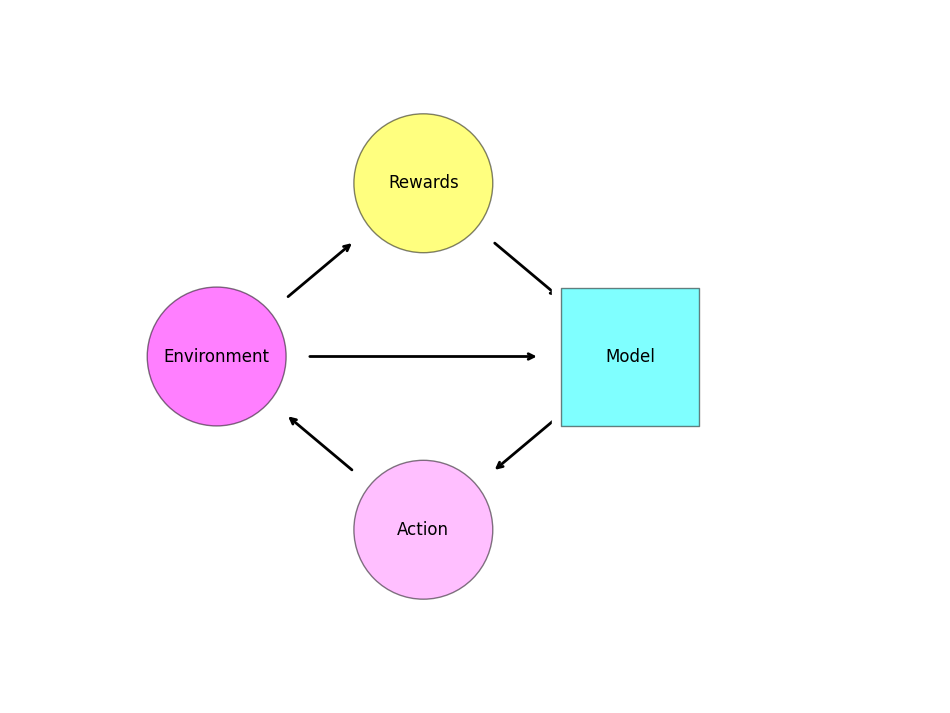

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize = (12,9))

from_nodes = ["Action", "Environment", "Model", "Environment", "Rewards"]
to_nodes = ["Environment", "Model", "Action", "Rewards",  "Model"]

df = pd.DataFrame({ 'from':from_nodes,
                   'to':to_nodes})
# Define Node Positions
pos = {'Environment':(1,2),
        'Rewards':(2,3),
        'Model':(3,2),
        'Action':(2,1)}

# Define Node Colors
NodeColors = {'Environment':[1,0,1],
        'Rewards':[1,1,0],
        'Model':[0,1,1],
        'Action':[1,.5,1]}

Labels = {}
i = 0
for a in from_nodes:
    Labels[a]=a
    i +=1
Labels[to_nodes[-1]]=to_nodes[-1]

# Build your graph. Note that we use the DiGraph function to create the graph! This adds arrows
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

# Define the colormap and set nodes to circles, but the last one to a triangle
Circles = []
Traingle = []
Colors_Circles = []
Colors_Traingle = []
for n in G.nodes:
    if n != 'Model':
        Circles.append(n)
        Colors_Circles.append(NodeColors[n])
    else:
        Traingle.append(n)
        Colors_Traingle.append(NodeColors[n])

# By making a white node that is larger, I can make the arrow "start" beyond the node
nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1.25e4,
                       node_shape='o',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1e4,
                       node_shape='o',
                       node_color=Colors_Circles,
                       edgecolors='black',
                       alpha=0.5)


nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Traingle,
                       node_size=1.25e4,
                       node_shape='s',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Traingle,
                       node_size=1e4,
                       node_shape='s',
                       node_color=Colors_Traingle,
                       edgecolors='black',
                       alpha=0.5)


nx.draw_networkx_labels(G, pos, Labels, font_size=12)

# Again by making the node_size larer, I can have the arrows end before they actually hit the node
edges = nx.draw_networkx_edges(G, pos, node_size=1.8e4,
                               arrowstyle='->',width=2)

plt.xlim(0,4.5)
plt.ylim(0,4)
plt.axis('off')
plt.show()

# Prepare Data

In [3]:
DATA_FOLDER = r"E:\PythonCodes\StockAnalysis\Data\IndianStocks_IntradayData"
select_interval_list = ['day'] # 'minute', '3minute', '5minute', '10minute', '15minute', '30minute', '60minute'
file_list = []
stock_list = []
for i, each_interval in enumerate(select_interval_list):
    file_list += [filename for filename in os.listdir(DATA_FOLDER) if filename.endswith(f"_{each_interval}_data.csv")]
    if i == 0:
        stock_list +=  [filename.split('_')[0] for filename in file_list]
print(stock_list)

['ACC', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'AMBUJACEM', 'APOLLOHOSP', 'ASIANPAINT', 'AUROPHARMA', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BANDHANBNK', 'BANKBARODA', 'BERGEPAINT', 'BHARTIARTL', 'BIOCON', 'BOSCHLTD', 'BPCL', 'BRITANNIA', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COLPAL', 'DABUR', 'DIVISLAB', 'DLF', 'DMART', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GLAND', 'GODREJCP', 'GRASIM', 'HAVELLS', 'HCLTECH', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HDFC', 'HEROMOTOCO', 'HINDALCO', 'HINDPETRO', 'HINDUNILVR', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'IGL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC', 'ITC', 'JINDALSTEL', 'JSWSTEEL', 'JUBLFOOD', 'KOTAKBANK', 'LICI', 'LTI', 'LT', 'LUPIN', 'MARICO', 'MARUTI', 'MCDOWELL-N', 'MM', 'MUTHOOTFIN', 'NAUKRI', 'NESTLEIND', 'NIFTY 50', 'NIFTY BANK', 'NMDC', 'NTPC', 'ONGC', 'PEL', 'PGHH', 'PIDILITIND', 'PIIND', 'PNB', 'POWERGRID', 'RELIANCE', 'SAIL', 'SBICARD', 'SBILIFE', 'SBIN', 'SHREECEM', 'SIEMENS', 'SUNPHARMA', 'TATACONSUM

In [4]:
file_name = stock_list[0] + '_' + select_interval_list[0] + "_data.csv"
file_name

'ACC_day_data.csv'

In [5]:
DATA_FOLDER = r"E:\PythonCodes\StockAnalysis\Data\IndianStocks_IntradayData"
data_df = pd.read_csv(os.path.join(DATA_FOLDER, file_name))
data_df = data_df.drop(data_df.columns[0], axis=1)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.set_index('date', inplace=True)
data_df.head()

,close,high,low,open,volume
date,,,,,
2015-01-01 00:00:00+05:30,1403.55,1411.00,1397.95,1400.15,101070
2015-01-02 00:00:00+05:30,1425.90,1431.00,1405.55,1406.40,153349
2015-01-05 00:00:00+05:30,1433.65,1439.75,1423.75,1425.00,207979
2015-01-06 00:00:00+05:30,1383.55,1428.95,1370.55,1425.00,368755
2015-01-07 00:00:00+05:30,1367.45,1384.95,1336.20,1382.00,301895


## Previous 30 days data

In [6]:
prev_30days_df = pd.concat([data_df.shift(i+1) for i in range(0,30)], axis=1)
prev_30days_df.columns = [f"{x}_{i+1}" for i in range(0,30) for x in data_df.columns]
prev_30days_df.dropna(inplace=True)
prev_30days_df

,close_1,high_1,low_1,open_1,volume_1,close_2,high_2,low_2,open_2,volume_2,...,close_29,high_29,low_29,open_29,volume_29,close_30,high_30,low_30,open_30,volume_30
date,,,,,,,,,,,,,,,,,,,,,
2015-02-13 00:00:00+05:30,1595.20,1614.30,1560.65,1567.45,875361.0,1552.60,1574.80,1546.30,1567.00,489855.0,...,1425.90,1431.00,1405.55,1406.40,153349.0,1403.55,1411.00,1397.95,1400.15,101070.0
2015-02-16 00:00:00+05:30,1625.05,1637.55,1605.00,1608.00,542357.0,1595.20,1614.30,1560.65,1567.45,875361.0,...,1433.65,1439.75,1423.75,1425.00,207979.0,1425.90,1431.00,1405.55,1406.40,153349.0
2015-02-18 00:00:00+05:30,1614.45,1645.00,1605.10,1632.40,327835.0,1625.05,1637.55,1605.00,1608.00,542357.0,...,1383.55,1428.95,1370.55,1425.00,368755.0,1433.65,1439.75,1423.75,1425.00,207979.0
2015-02-19 00:00:00+05:30,1653.30,1658.70,1611.10,1614.70,471411.0,1614.45,1645.00,1605.10,1632.40,327835.0,...,1367.45,1384.95,1336.20,1382.00,301895.0,1383.55,1428.95,1370.55,1425.00,368755.0
2015-02-20 00:00:00+05:30,1615.15,1665.00,1602.70,1662.40,337618.0,1653.30,1658.70,1611.10,1614.70,471411.0,...,1391.40,1396.65,1373.25,1378.00,94344.0,1367.45,1384.95,1336.20,1382.00,301895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17 00:00:00+05:30,2243.65,2285.95,2237.05,2272.00,446497.0,2253.90,2318.00,2242.90,2316.00,528138.0,...,2288.15,2305.00,2285.00,2303.90,245656.0,2290.05,2307.35,2276.20,2305.00,1374277.0
2022-10-18 00:00:00+05:30,2270.10,2285.05,2205.30,2232.00,1512370.0,2243.65,2285.95,2237.05,2272.00,446497.0,...,2329.95,2354.90,2280.40,2297.00,1018694.0,2288.15,2305.00,2285.00,2303.90,245656.0
2022-10-19 00:00:00+05:30,2219.25,2293.20,2216.00,2259.00,1189726.0,2270.10,2285.05,2205.30,2232.00,1512370.0,...,2405.35,2446.95,2329.00,2340.00,2631230.0,2329.95,2354.90,2280.40,2297.00,1018694.0


# Last Year Same Month (t-15 to t+15)

In [7]:
def get_previous_year_timestamp(input_df, current_index):
    found_flag = False
    trail_count = 0
    while True:
        previous_year_timestamp = current_index - pd.Timedelta(365, "day")
        if not previous_year_timestamp in input_df.index:
            previous_year_timestamp = previous_year_timestamp - pd.Timedelta(1, "day")
        else:
            found_flag = True
            break
        if trail_count > 10:
            break
        trail_count += 1
    return found_flag, previous_year_timestamp


In [8]:
from tqdm import tqdm
last_year_data_df = pd.DataFrame()
lastyear_index_list = []
for each_index in tqdm(data_df.index):
    found, prev_year_timestamp = get_previous_year_timestamp(data_df, each_index)
    if not found:
        continue
    prev_row_num = data_df.index.get_loc(prev_year_timestamp)
    if (prev_row_num<15) or (prev_row_num >= len(data_df)-15):
        continue
    this_last_year_data = data_df.iloc[prev_row_num-15:prev_row_num+15].values.flatten()
    last_year_data_df = pd.concat([last_year_data_df, pd.Series(this_last_year_data)], axis=1)
    lastyear_index_list.append(each_index)
last_year_data_df = last_year_data_df.T
last_year_data_df.columns = [f"{x}_y{i+1}" for i in range(-15,15) for x in data_df.columns]
last_year_data_df.index = lastyear_index_list

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1907/1907 [00:08<00:00, 222.58it/s]


In [9]:
last_year_data_df

,close_y-14,high_y-14,low_y-14,open_y-14,volume_y-14,close_y-13,high_y-13,low_y-13,open_y-13,volume_y-13,...,close_y14,high_y14,low_y14,open_y14,volume_y14,close_y15,high_y15,low_y15,open_y15,volume_y15
2016-01-22 00:00:00+05:30,1403.55,1411.00,1397.95,1400.15,101070.0,1425.90,1431.00,1405.55,1406.40,153349.0,...,1552.60,1574.80,1546.30,1567.00,489855.0,1595.20,1614.30,1560.65,1567.45,875361.0
2016-01-27 00:00:00+05:30,1433.65,1439.75,1423.75,1425.00,207979.0,1383.55,1428.95,1370.55,1425.00,368755.0,...,1625.05,1637.55,1605.00,1608.00,542357.0,1614.45,1645.00,1605.10,1632.40,327835.0
2016-01-28 00:00:00+05:30,1383.55,1428.95,1370.55,1425.00,368755.0,1367.45,1384.95,1336.20,1382.00,301895.0,...,1614.45,1645.00,1605.10,1632.40,327835.0,1653.30,1658.70,1611.10,1614.70,471411.0
2016-01-29 00:00:00+05:30,1367.45,1384.95,1336.20,1382.00,301895.0,1391.40,1396.65,1373.25,1378.00,94344.0,...,1653.30,1658.70,1611.10,1614.70,471411.0,1615.15,1665.00,1602.70,1662.40,337618.0
2016-02-02 00:00:00+05:30,1398.50,1410.95,1378.00,1397.80,275773.0,1404.60,1409.25,1390.10,1400.00,158639.0,...,1620.40,1625.15,1600.00,1623.40,288973.0,1615.95,1634.95,1609.00,1628.00,304425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 00:00:00+05:30,2351.05,2380.50,2340.05,2375.00,380958.0,2298.75,2372.95,2281.00,2368.00,434577.0,...,2420.50,2428.75,2394.15,2404.15,364903.0,2431.45,2437.45,2419.05,2425.90,68940.0
2022-10-18 00:00:00+05:30,2298.75,2372.95,2281.00,2368.00,434577.0,2331.85,2346.75,2286.50,2305.55,363257.0,...,2431.45,2437.45,2419.05,2425.90,68940.0,2518.35,2530.00,2440.05,2453.85,878142.0
2022-10-19 00:00:00+05:30,2331.85,2346.75,2286.50,2305.55,363257.0,2300.25,2357.90,2286.05,2334.00,304307.0,...,2518.35,2530.00,2440.05,2453.85,878142.0,2538.30,2552.50,2502.05,2523.00,531520.0
2022-10-20 00:00:00+05:30,2300.25,2357.90,2286.05,2334.00,304307.0,2271.10,2293.35,2245.10,2290.00,518866.0,...,2538.30,2552.50,2502.05,2523.00,531520.0,2554.15,2568.35,2513.10,2530.70,414868.0


# Techinical Indicators

- MVA Crossover
- EMVA Crossover
- RSI
- ADX
- MACD

In [10]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))
print(os.path.dirname(os.getcwd()))

E:\PythonCodes\Docker\OpenStockView


In [11]:
from TechnicalAnalysis.moving_average_compution import simple_moving_average, exponential_moving_average, moving_average_converge_divergence
from TechnicalAnalysis.adx_computation import adx_run
from TechnicalAnalysis.rsi_indicator import rsi

short_window=20
longer_window=50
adx_window=14
mva_shorter, mva_longer, mva_cross_over = simple_moving_average(data_df.shift(1), short_window, longer_window)
emva_shorter, emva_longer, ewmva_cross_over = exponential_moving_average(data_df.shift(1), short_window, longer_window)
adx_data = pd.Series(adx_run(data_df.shift(1), adx_window), index=data_df.index)
macd_emva = moving_average_converge_divergence(data_df.shift(1), short_window=12, longer_window=26, signal_period=9)
rsi_data = rsi(data_df.shift(1), window_size=14)

In [12]:
techical_indicators_df = pd.concat([adx_data, rsi_data, macd_emva, mva_cross_over, ewmva_cross_over], axis=1)
techical_indicators_df.columns = ['ADX', 'RSI', 'MACD', 'MVA_Crossover', 'EWMVA_Crossover']
techical_indicators_df

,ADX,RSI,MACD,MVA_Crossover,EWMVA_Crossover
date,,,,,
2015-01-01 00:00:00+05:30,NaN,NaN,NaN,0,0
2015-01-02 00:00:00+05:30,NaN,NaN,0.000000,0,0
2015-01-05 00:00:00+05:30,NaN,100.000000,1.426325,0,1
2015-01-06 00:00:00+05:30,NaN,100.000000,2.736883,0,0
2015-01-07 00:00:00+05:30,NaN,84.683249,0.208090,0,0
...,...,...,...,...,...
2022-10-17 00:00:00+05:30,27.597297,38.397991,-25.243126,0,0
2022-10-18 00:00:00+05:30,28.289525,41.112831,-22.593903,0,0
2022-10-19 00:00:00+05:30,28.746837,37.675232,-22.847446,0,-1


# Consolidating All Input Data

In [13]:
consolidated_df = pd.merge(prev_30days_df, last_year_data_df, left_index=True, right_index=True, how='outer')
consolidated_df = pd.merge(consolidated_df, techical_indicators_df, left_index=True, right_index=True, how='outer')
consolidated_df.dropna(inplace=True)
consolidated_df.head()

,close_1,high_1,low_1,open_1,volume_1,close_2,high_2,low_2,open_2,volume_2,...,close_y15,high_y15,low_y15,open_y15,volume_y15,ADX,RSI,MACD,MVA_Crossover,EWMVA_Crossover
2016-01-22 00:00:00+05:30,1228.45,1236.95,1211.25,1225.0,209284.0,1212.25,1229.00,1205.00,1218.90,156349.0,...,1595.20,1614.30,1560.65,1567.45,875361.0,36.672236,30.838888,-9.230236,0,0
2016-01-27 00:00:00+05:30,1245.00,1263.50,1241.05,1250.0,124527.0,1241.00,1256.65,1230.05,1239.95,123254.0,...,1614.45,1645.00,1605.10,1632.40,327835.0,36.454707,37.041093,-4.361198,0,0
2016-01-28 00:00:00+05:30,1230.35,1250.00,1228.00,1249.0,112892.0,1245.00,1263.50,1241.05,1250.00,124527.0,...,1653.30,1658.70,1611.10,1614.70,471411.0,36.547265,33.970677,-3.339610,0,0
2016-01-29 00:00:00+05:30,1214.95,1234.90,1208.00,1232.4,134504.0,1230.35,1250.00,1228.00,1249.00,112892.0,...,1615.15,1665.00,1602.70,1662.40,337618.0,37.162298,31.056391,-3.267510,0,0
2016-02-02 00:00:00+05:30,1271.85,1278.90,1240.30,1245.0,210958.0,1240.05,1253.50,1216.05,1220.10,254442.0,...,1615.95,1634.95,1609.00,1628.00,304425.0,34.880044,49.157692,2.434341,0,0


In [158]:
consolidated_df.tail()

,close_1,high_1,low_1,open_1,volume_1,close_2,high_2,low_2,open_2,volume_2,...,close_y15,high_y15,low_y15,open_y15,volume_y15,ADX,RSI,MACD,MVA_Crossover,EWMVA_Crossover
2022-10-14 00:00:00+05:30,2253.90,2318.00,2242.90,2316.0,528138.0,2316.80,2339.40,2282.10,2318.0,611941.0,...,2431.45,2437.45,2419.05,2425.90,68940.0,27.213451,39.045746,-24.513624,0,0
2022-10-18 00:00:00+05:30,2270.10,2285.05,2205.30,2232.0,1512370.0,2243.65,2285.95,2237.05,2272.0,446497.0,...,2518.35,2530.00,2440.05,2453.85,878142.0,28.289525,41.112831,-22.593903,0,0
2022-10-19 00:00:00+05:30,2219.25,2293.20,2216.00,2259.0,1189726.0,2270.10,2285.05,2205.30,2232.0,1512370.0,...,2538.30,2552.50,2502.05,2523.00,531520.0,28.746837,37.675232,-22.847446,0,-1
2022-10-20 00:00:00+05:30,2246.45,2258.40,2212.55,2219.0,724058.0,2219.25,2293.20,2216.00,2259.0,1189726.0,...,2554.15,2568.35,2513.10,2530.70,414868.0,29.211361,40.539219,-19.874054,-1,0
2022-10-21 00:00:00+05:30,2287.60,2299.00,2227.95,2230.0,713402.0,2246.45,2258.40,2212.55,2219.0,724058.0,...,2558.20,2564.80,2525.00,2545.95,298854.0,28.698385,44.680851,-14.098397,0,0


# Defining Output Data

In [17]:
data_df['close']

date
2015-01-01 00:00:00+05:30    1403.55
2015-01-02 00:00:00+05:30    1425.90
2015-01-05 00:00:00+05:30    1433.65
2015-01-06 00:00:00+05:30    1383.55
2015-01-07 00:00:00+05:30    1367.45
                              ...   
2022-10-17 00:00:00+05:30    2270.10
2022-10-18 00:00:00+05:30    2219.25
2022-10-19 00:00:00+05:30    2246.45
2022-10-20 00:00:00+05:30    2287.60
2022-10-21 00:00:00+05:30    2256.55
Name: close, Length: 1907, dtype: float64

In [18]:
data_df['close'].diff(1)

date
2015-01-01 00:00:00+05:30      NaN
2015-01-02 00:00:00+05:30    22.35
2015-01-05 00:00:00+05:30     7.75
2015-01-06 00:00:00+05:30   -50.10
2015-01-07 00:00:00+05:30   -16.10
                             ...  
2022-10-17 00:00:00+05:30    26.45
2022-10-18 00:00:00+05:30   -50.85
2022-10-19 00:00:00+05:30    27.20
2022-10-20 00:00:00+05:30    41.15
2022-10-21 00:00:00+05:30   -31.05
Name: close, Length: 1907, dtype: float64

# Defining Rewards